# 04: Different Topologies
This notebook contains all the useful computations to make Figures in 
Panel 4

In [1]:
%matplotlib inline
#
from lrgsglib.core import *
#
move_to_rootf()
plt.style.use('ipynb/nb_plotsheet.mplstyle')
#
datpath = os.path.join('data')
subdatapath = os.path.join(datpath, 'plot', 'paper', 'panel_4')
erdatpath = os.path.join(subdatapath, 'phtra_ER')
#
kwargs_lines = dict(lw=5, marker='')

Current working directory: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


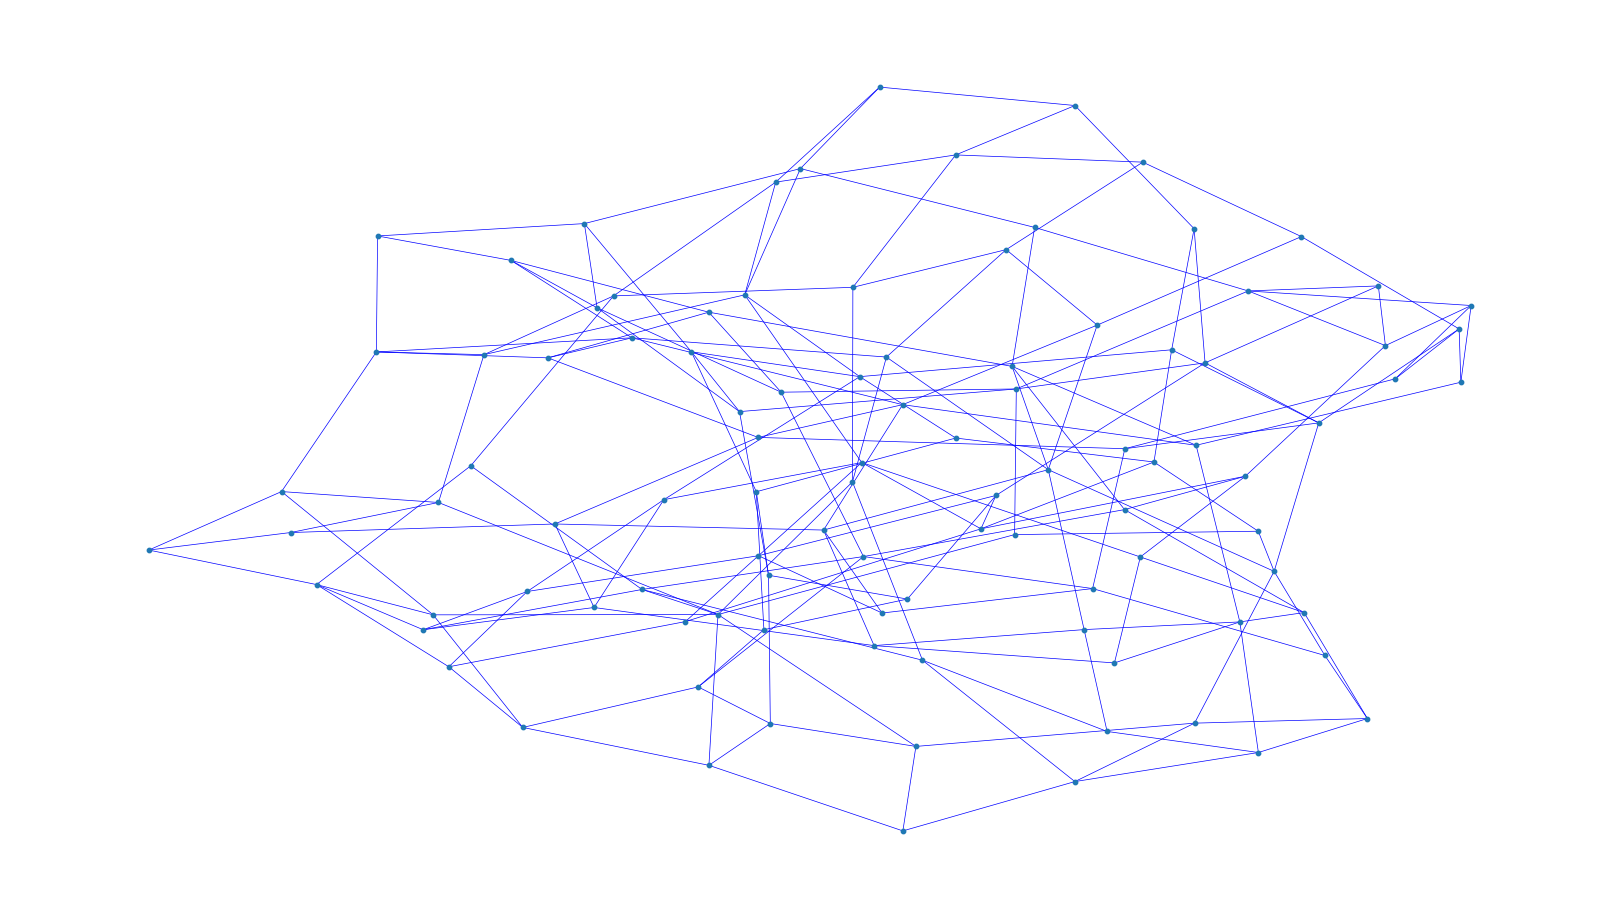

In [17]:
l = Lattice2D(10, pflip=0.1, prew=0.2)
# l.flip_random_fract_edges()
nx.draw(l.G, edge_color=l.get_edge_color(), node_size=10,width=0.5)

## Fig. (a): the Phase Transition for an Erdos Renyi

In [2]:
sizes = [128, 256, 512, 1024, 2048, 4096]
pathfname = os.path.join(erdatpath, "OP_ER10_N")

In [ ]:
colors = restr_twilight(np.linspace(0., 1., len(sizes)))
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

fig, ax = plt.subplots(figsize=(9, 8))
for cc, size in enumerate(sizes):
    data = np.loadtxt(pathfname + str(size), delimiter=',')
    y_data = gaussian_filter(data[:, 0], sigma=2)
    p = data[:, 9]
    y_data = y_data
    ax.plot(p, y_data, label=fr'${size}$', zorder=1/(cc+1), **kwargs_lines)
#
ax.set_xlabel(r'$p$')
ax.set_ylabel(r'$P_{\infty}$')
#
ax.legend(fontsize=28)

## Fig. (b): the Phase Transition for a Watts Strogatz

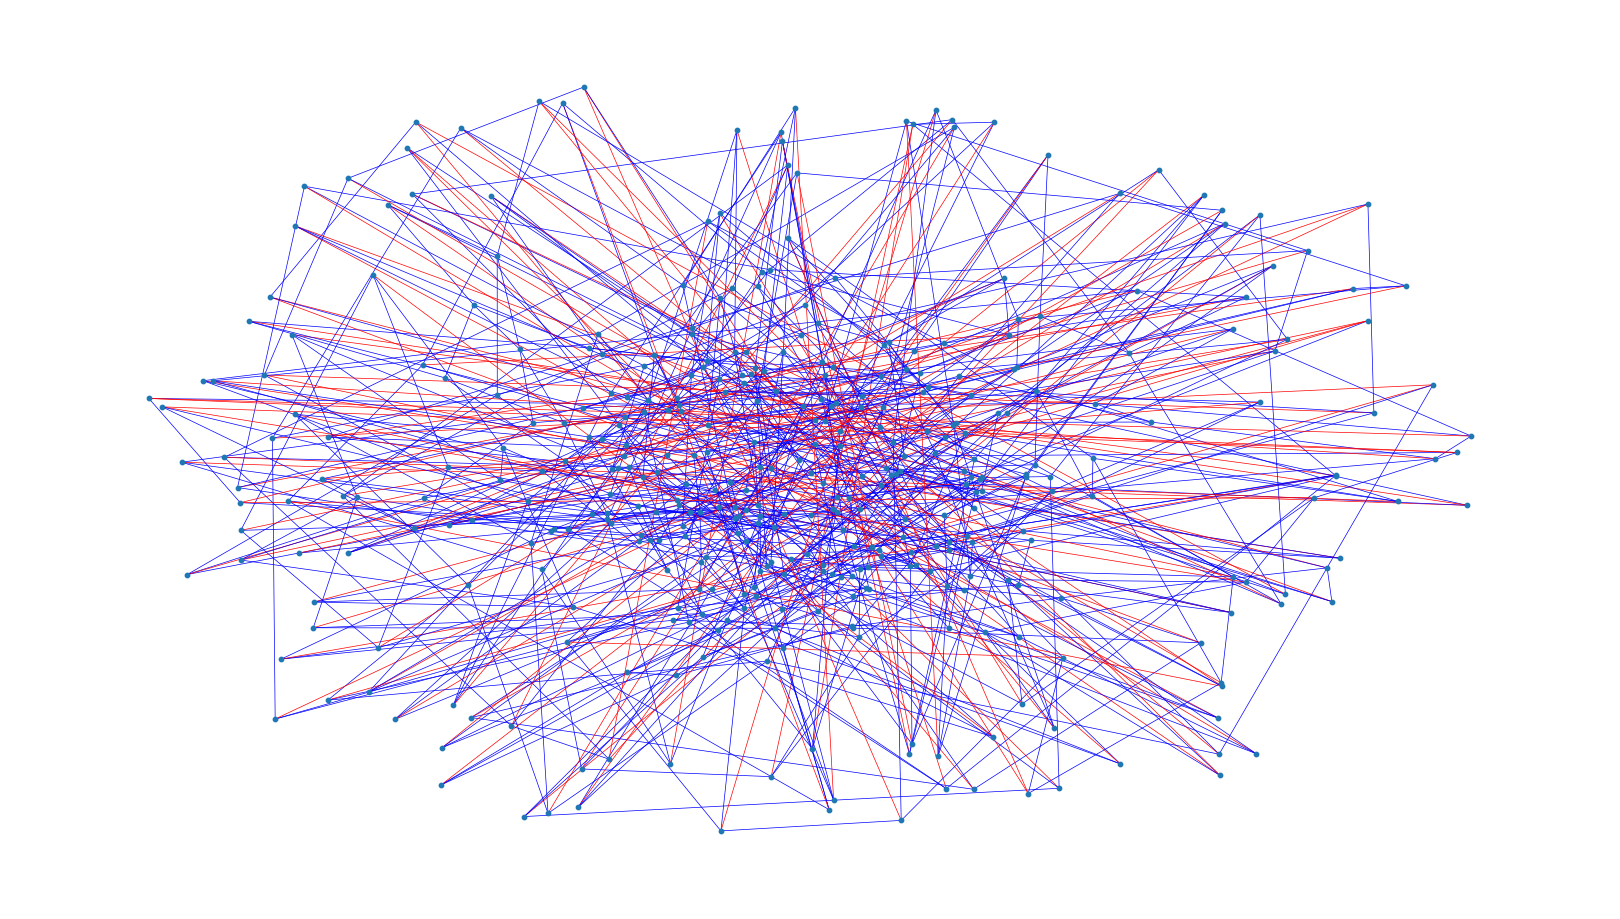

In [31]:
np.diag(l.get_abs_degree_matrix().todense())

array([4, 4, 4, 4, 3, 4, 4, 4, 5, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 5, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 5,
       4, 4, 4, 4, 4, 5, 5, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 3, 4, 4, 4, 3, 5, 4, 4])